In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Reshape, LeakyReLU
from tensorflow.keras.optimizers import Adam


In [8]:
# Load MNIST data
(x_train, _), (_, _) = mnist.load_data()

# Normalize data
x_train = x_train / 127.5 - 1.0
x_train = np.expand_dims(x_train, axis=-1)


In [9]:
# GAN parameters
img_rows, img_cols, channels = 28, 28, 1
latent_dim = 100

# Generator model
generator = Sequential([
    Dense(128, input_dim=latent_dim),
    LeakyReLU(alpha=0.2),
    Dense(256),
    LeakyReLU(alpha=0.2),
    Dense(512),
    LeakyReLU(alpha=0.2),
    Dense(img_rows * img_cols * channels, activation='tanh'),
    Reshape((img_rows, img_cols, channels))
])

# Discriminator model
discriminator = Sequential([
    Flatten(input_shape=(img_rows, img_cols, channels)),
    Dense(512),
    LeakyReLU(alpha=0.2),
    Dense(256),
    LeakyReLU(alpha=0.2),
    Dense(1, activation='sigmoid')
])


In [10]:
discriminator.compile(loss='binary_crossentropy',
                      optimizer=Adam(learning_rate=0.0002, beta_1=0.5),
                      metrics=['accuracy'])

In [11]:
# Combined GAN model
discriminator.trainable = False
gan_input = generator.input
gan_output = discriminator(generator(gan_input))
gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy',
            optimizer=Adam(learning_rate=0.0002, beta_1=0.5))



2/2 [==============================] - 0s 0s/step
Epoch 0: [D loss: 0.6234550476074219, acc.: 60.15625%] [G loss: 0.7125032544136047]
1/1 [==============================] - 0s 176ms/step


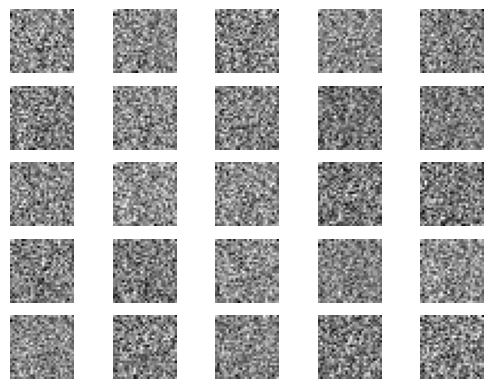

2/2 [==============================] - 0s 3ms/step
Epoch 100: [D loss: 0.6025110185146332, acc.: 50.0%] [G loss: 0.8451703786849976]
2/2 [==============================] - 0s 0s/step
Epoch 200: [D loss: 0.41750217974185944, acc.: 96.09375%] [G loss: 1.175362229347229]
2/2 [==============================] - 0s 0s/step
Epoch 300: [D loss: 0.4667482078075409, acc.: 77.34375%] [G loss: 1.1999613046646118]
2/2 [==============================] - 0s 16ms/step
Epoch 400: [D loss: 0.3995044529438019, acc.: 95.3125%] [G loss: 1.565609335899353]
2/2 [==============================] - 0s 0s/step
Epoch 500: [D loss: 0.5688928365707397, acc.: 73.4375%] [G loss: 1.4790761470794678]
2/2 [==============================] - 0s 3ms/step
Epoch 600: [D loss: 0.5934218317270279, acc.: 65.625%] [G loss: 1.2177765369415283]
2/2 [==============================] - 0s 4ms/step
Epoch 700: [D loss: 0.432431161403656, acc.: 84.375%] [G loss: 1.632083773612976]
2/2 [==============================] - 0s 4ms/step
Epoch

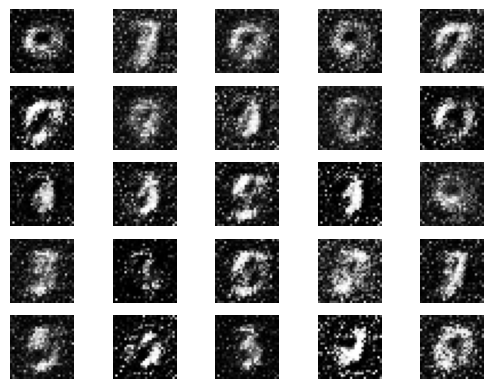

2/2 [==============================] - 0s 0s/step
Epoch 1100: [D loss: 0.5159163326025009, acc.: 78.125%] [G loss: 1.6352496147155762]
2/2 [==============================] - 0s 16ms/step
Epoch 1200: [D loss: 0.4998909831047058, acc.: 76.5625%] [G loss: 1.7556347846984863]
2/2 [==============================] - 0s 0s/step
Epoch 1300: [D loss: 0.47686147689819336, acc.: 80.46875%] [G loss: 1.69154691696167]
2/2 [==============================] - 0s 5ms/step
Epoch 1400: [D loss: 0.3773379623889923, acc.: 90.625%] [G loss: 1.8951374292373657]
2/2 [==============================] - 0s 0s/step
Epoch 1500: [D loss: 0.39698874950408936, acc.: 87.5%] [G loss: 1.9521329402923584]
2/2 [==============================] - 0s 0s/step
Epoch 1600: [D loss: 0.3447977900505066, acc.: 92.96875%] [G loss: 2.2939703464508057]
2/2 [==============================] - 0s 0s/step
Epoch 1700: [D loss: 0.4304462969303131, acc.: 81.25%] [G loss: 1.8833954334259033]
2/2 [==============================] - 0s 2ms/step

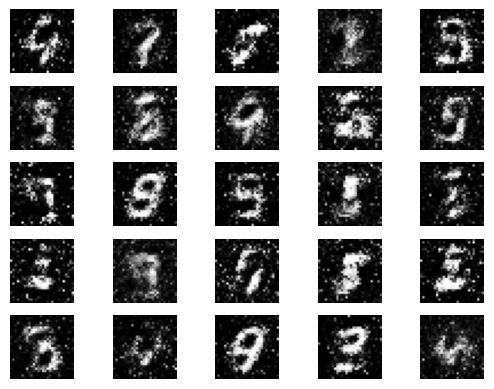

2/2 [==============================] - 0s 4ms/step
Epoch 2100: [D loss: 0.45886364579200745, acc.: 82.03125%] [G loss: 1.6582005023956299]
2/2 [==============================] - 0s 14ms/step
Epoch 2200: [D loss: 0.3298415094614029, acc.: 90.625%] [G loss: 2.159578323364258]
2/2 [==============================] - 0s 0s/step
Epoch 2300: [D loss: 0.4425133913755417, acc.: 83.59375%] [G loss: 2.0033252239227295]
2/2 [==============================] - 0s 4ms/step
Epoch 2400: [D loss: 0.40716542303562164, acc.: 85.9375%] [G loss: 2.098839521408081]
2/2 [==============================] - 0s 0s/step
Epoch 2500: [D loss: 0.40098799765110016, acc.: 85.15625%] [G loss: 1.9996808767318726]
2/2 [==============================] - 0s 16ms/step
Epoch 2600: [D loss: 0.2749899625778198, acc.: 92.1875%] [G loss: 2.5349416732788086]
2/2 [==============================] - 0s 0s/step
Epoch 2700: [D loss: 0.34486620128154755, acc.: 87.5%] [G loss: 2.2767739295959473]
2/2 [==============================] - 0s

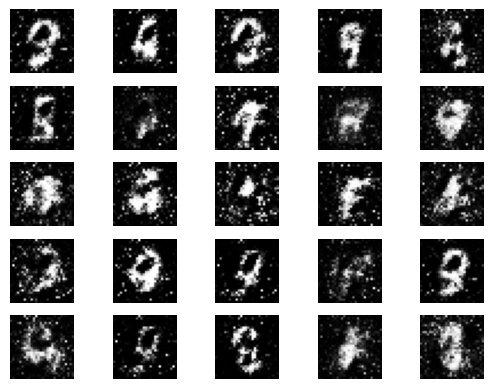

2/2 [==============================] - 0s 6ms/step
Epoch 3100: [D loss: 0.4259961247444153, acc.: 79.6875%] [G loss: 2.2569563388824463]
2/2 [==============================] - 0s 16ms/step
Epoch 3200: [D loss: 0.29519595205783844, acc.: 89.84375%] [G loss: 2.007445812225342]
2/2 [==============================] - 0s 0s/step
Epoch 3300: [D loss: 0.48531630635261536, acc.: 76.5625%] [G loss: 2.192523956298828]
2/2 [==============================] - 0s 16ms/step
Epoch 3400: [D loss: 0.4976399689912796, acc.: 78.125%] [G loss: 1.9730876684188843]
2/2 [==============================] - 0s 13ms/step
Epoch 3500: [D loss: 0.35392817854881287, acc.: 84.375%] [G loss: 2.165313720703125]
2/2 [==============================] - 0s 0s/step
Epoch 3600: [D loss: 0.380454421043396, acc.: 84.375%] [G loss: 2.0815224647521973]
2/2 [==============================] - 0s 0s/step
Epoch 3700: [D loss: 0.2782028317451477, acc.: 91.40625%] [G loss: 2.4403138160705566]
2/2 [==============================] - 0s 7

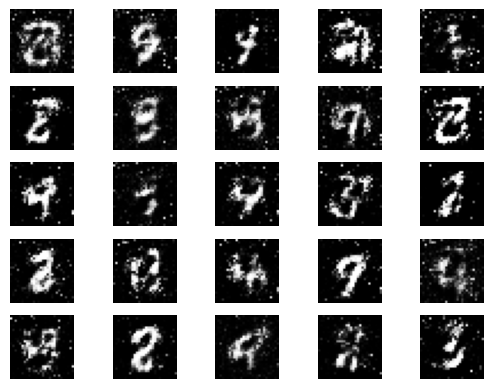

2/2 [==============================] - 0s 0s/step
Epoch 4100: [D loss: 0.3935982584953308, acc.: 83.59375%] [G loss: 1.810346245765686]
2/2 [==============================] - 0s 0s/step
Epoch 4200: [D loss: 0.4605272263288498, acc.: 77.34375%] [G loss: 1.7489820718765259]
2/2 [==============================] - 0s 0s/step
Epoch 4300: [D loss: 0.5787268579006195, acc.: 70.3125%] [G loss: 1.882077932357788]
2/2 [==============================] - 0s 4ms/step
Epoch 4400: [D loss: 0.5227048099040985, acc.: 71.09375%] [G loss: 1.805598258972168]
2/2 [==============================] - 0s 0s/step
Epoch 4500: [D loss: 0.38321319222450256, acc.: 85.9375%] [G loss: 1.8278729915618896]
2/2 [==============================] - 0s 6ms/step
Epoch 4600: [D loss: 0.3831551522016525, acc.: 85.9375%] [G loss: 1.7601799964904785]
2/2 [==============================] - 0s 5ms/step
Epoch 4700: [D loss: 0.4916626214981079, acc.: 74.21875%] [G loss: 1.5180374383926392]
2/2 [==============================] - 0s 0

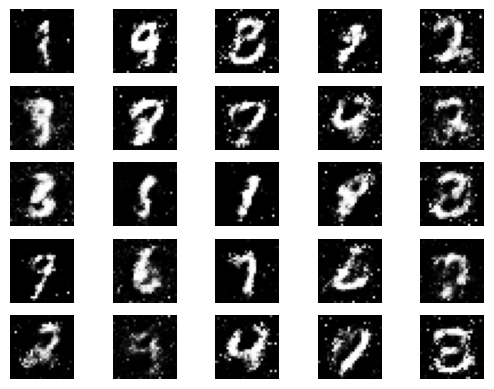

2/2 [==============================] - 0s 16ms/step
Epoch 5100: [D loss: 0.5155020952224731, acc.: 73.4375%] [G loss: 1.5058093070983887]
2/2 [==============================] - 0s 0s/step
Epoch 5200: [D loss: 0.5668576657772064, acc.: 67.96875%] [G loss: 1.5725479125976562]
2/2 [==============================] - 0s 0s/step
Epoch 5300: [D loss: 0.4954294115304947, acc.: 77.34375%] [G loss: 1.392819881439209]
2/2 [==============================] - 0s 0s/step
Epoch 5400: [D loss: 0.5353276431560516, acc.: 75.78125%] [G loss: 1.375694751739502]
2/2 [==============================] - 0s 16ms/step
Epoch 5500: [D loss: 0.5066584944725037, acc.: 77.34375%] [G loss: 1.542881965637207]
2/2 [==============================] - 0s 16ms/step
Epoch 5600: [D loss: 0.5512606501579285, acc.: 71.875%] [G loss: 1.3473461866378784]
2/2 [==============================] - 0s 0s/step
Epoch 5700: [D loss: 0.5098104476928711, acc.: 77.34375%] [G loss: 1.4644665718078613]
2/2 [==============================] - 0s

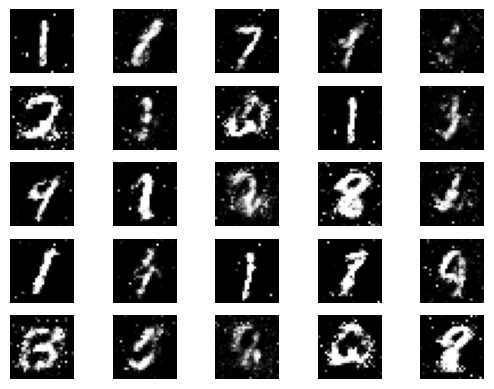

2/2 [==============================] - 0s 0s/step
Epoch 6100: [D loss: 0.551170289516449, acc.: 72.65625%] [G loss: 1.3744341135025024]
2/2 [==============================] - 0s 0s/step
Epoch 6200: [D loss: 0.556104838848114, acc.: 69.53125%] [G loss: 1.378355860710144]
2/2 [==============================] - 0s 0s/step
Epoch 6300: [D loss: 0.4476574510335922, acc.: 78.90625%] [G loss: 1.4997819662094116]
2/2 [==============================] - 0s 4ms/step
Epoch 6400: [D loss: 0.47979265451431274, acc.: 78.125%] [G loss: 1.5096467733383179]
2/2 [==============================] - 0s 5ms/step
Epoch 6500: [D loss: 0.5307678878307343, acc.: 75.78125%] [G loss: 1.426358699798584]
2/2 [==============================] - 0s 0s/step
Epoch 6600: [D loss: 0.5297790169715881, acc.: 69.53125%] [G loss: 1.4486054182052612]
2/2 [==============================] - 0s 4ms/step
Epoch 6700: [D loss: 0.5166876912117004, acc.: 72.65625%] [G loss: 1.4554131031036377]
2/2 [==============================] - 0s 0

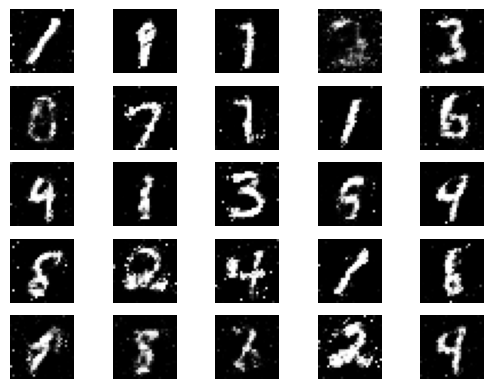

2/2 [==============================] - 0s 3ms/step
Epoch 7100: [D loss: 0.4946751594543457, acc.: 75.78125%] [G loss: 1.3795548677444458]
2/2 [==============================] - 0s 16ms/step
Epoch 7200: [D loss: 0.5534448623657227, acc.: 67.1875%] [G loss: 1.2951020002365112]
2/2 [==============================] - 0s 0s/step
Epoch 7300: [D loss: 0.49740085005760193, acc.: 78.125%] [G loss: 1.3976242542266846]
2/2 [==============================] - 0s 16ms/step
Epoch 7400: [D loss: 0.5150638818740845, acc.: 74.21875%] [G loss: 1.1448063850402832]
2/2 [==============================] - 0s 13ms/step
Epoch 7500: [D loss: 0.5684458613395691, acc.: 73.4375%] [G loss: 1.3115898370742798]
2/2 [==============================] - 0s 17ms/step
Epoch 7600: [D loss: 0.5111828446388245, acc.: 75.0%] [G loss: 1.4393224716186523]
2/2 [==============================] - 0s 0s/step
Epoch 7700: [D loss: 0.5186205208301544, acc.: 75.0%] [G loss: 1.3408172130584717]
2/2 [==============================] - 0s 0

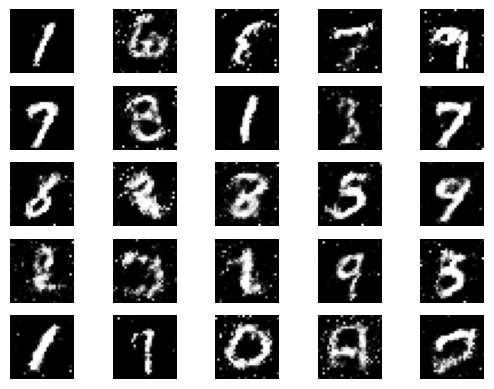

2/2 [==============================] - 0s 5ms/step
Epoch 8100: [D loss: 0.5075714737176895, acc.: 72.65625%] [G loss: 1.1770622730255127]
2/2 [==============================] - 0s 0s/step
Epoch 8200: [D loss: 0.5009826719760895, acc.: 76.5625%] [G loss: 1.3807995319366455]
2/2 [==============================] - 0s 16ms/step
Epoch 8300: [D loss: 0.46989089250564575, acc.: 78.90625%] [G loss: 1.268409252166748]
2/2 [==============================] - 0s 7ms/step
Epoch 8400: [D loss: 0.537026435136795, acc.: 75.0%] [G loss: 1.2977097034454346]
2/2 [==============================] - 0s 0s/step
Epoch 8500: [D loss: 0.5015192925930023, acc.: 81.25%] [G loss: 1.3065954446792603]
2/2 [==============================] - 0s 0s/step
Epoch 8600: [D loss: 0.5568884611129761, acc.: 69.53125%] [G loss: 1.2264113426208496]
2/2 [==============================] - 0s 12ms/step
Epoch 8700: [D loss: 0.5575689077377319, acc.: 66.40625%] [G loss: 1.4907773733139038]
2/2 [==============================] - 0s 16

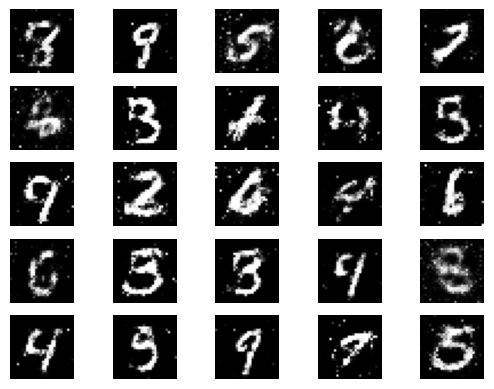

2/2 [==============================] - 0s 10ms/step
Epoch 9100: [D loss: 0.5009173452854156, acc.: 76.5625%] [G loss: 1.3349066972732544]
2/2 [==============================] - 0s 16ms/step
Epoch 9200: [D loss: 0.48042336106300354, acc.: 79.6875%] [G loss: 1.39872145652771]
2/2 [==============================] - 0s 16ms/step
Epoch 9300: [D loss: 0.5943398177623749, acc.: 67.96875%] [G loss: 1.3540356159210205]
2/2 [==============================] - 0s 8ms/step
Epoch 9400: [D loss: 0.5033390820026398, acc.: 73.4375%] [G loss: 1.40401291847229]
2/2 [==============================] - 0s 2ms/step
Epoch 9500: [D loss: 0.5400272309780121, acc.: 75.0%] [G loss: 1.1809550523757935]
2/2 [==============================] - 0s 8ms/step
Epoch 9600: [D loss: 0.5126869678497314, acc.: 78.125%] [G loss: 1.3953602313995361]
2/2 [==============================] - 0s 8ms/step
Epoch 9700: [D loss: 0.4947884678840637, acc.: 73.4375%] [G loss: 1.4321575164794922]
2/2 [==============================] - 0s 47

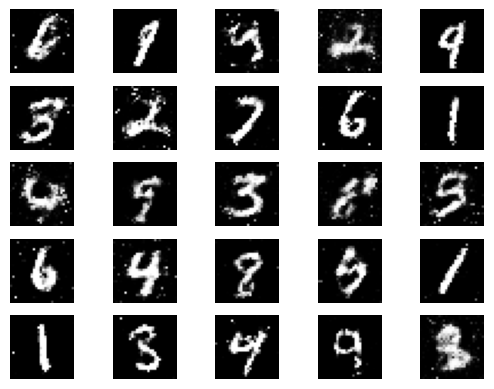

2/2 [==============================] - 0s 8ms/step
Epoch 10100: [D loss: 0.5762981176376343, acc.: 70.3125%] [G loss: 1.481152892112732]
2/2 [==============================] - 0s 12ms/step
Epoch 10200: [D loss: 0.5247240513563156, acc.: 74.21875%] [G loss: 1.5252690315246582]
2/2 [==============================] - 0s 6ms/step
Epoch 10300: [D loss: 0.5753298699855804, acc.: 67.96875%] [G loss: 1.3930314779281616]
2/2 [==============================] - 0s 8ms/step
Epoch 10400: [D loss: 0.6182514131069183, acc.: 60.9375%] [G loss: 1.3741278648376465]
2/2 [==============================] - 0s 11ms/step
Epoch 10500: [D loss: 0.5081082135438919, acc.: 77.34375%] [G loss: 1.267592191696167]
2/2 [==============================] - 0s 12ms/step
Epoch 10600: [D loss: 0.5982741713523865, acc.: 62.5%] [G loss: 1.3810405731201172]
2/2 [==============================] - 0s 13ms/step
Epoch 10700: [D loss: 0.6566083431243896, acc.: 63.28125%] [G loss: 1.1972440481185913]
2/2 [==========================

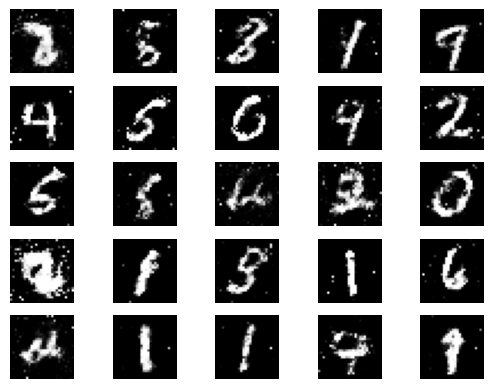

2/2 [==============================] - 0s 14ms/step
Epoch 11100: [D loss: 0.5515539646148682, acc.: 70.3125%] [G loss: 1.2510300874710083]
2/2 [==============================] - 0s 8ms/step
Epoch 11200: [D loss: 0.5528949499130249, acc.: 72.65625%] [G loss: 1.2200591564178467]
2/2 [==============================] - 0s 8ms/step
Epoch 11300: [D loss: 0.4620172828435898, acc.: 78.125%] [G loss: 1.612390398979187]
2/2 [==============================] - 0s 8ms/step
Epoch 11400: [D loss: 0.4827108681201935, acc.: 75.78125%] [G loss: 1.2903915643692017]
2/2 [==============================] - 0s 7ms/step
Epoch 11500: [D loss: 0.5462094694375992, acc.: 69.53125%] [G loss: 1.4193756580352783]
2/2 [==============================] - 0s 64ms/step
Epoch 11600: [D loss: 0.5657172352075577, acc.: 68.75%] [G loss: 1.253685712814331]
2/2 [==============================] - 0s 48ms/step
Epoch 11700: [D loss: 0.5456163287162781, acc.: 69.53125%] [G loss: 1.2305517196655273]
2/2 [===========================

In [12]:
# Training GAN
batch_size = 64
epochs = 20000

for epoch in range(epochs):
    # Select a random batch of images
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_imgs = x_train[idx]

    # Generate fake images
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_imgs = generator.predict(noise)

    # Train discriminator
    d_loss_real = discriminator.train_on_batch(real_imgs, np.ones((batch_size, 1)))
    d_loss_fake = discriminator.train_on_batch(fake_imgs, np.zeros((batch_size, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train generator (adversarial network)
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    valid_y = np.ones((batch_size, 1))
    g_loss = gan.train_on_batch(noise, valid_y)

    # Print progress
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: [D loss: {d_loss[0]}, acc.: {100 * d_loss[1]}%] [G loss: {g_loss}]")

        # Save generated images
        if epoch % 1000 == 0:
            r, c = 5, 5
            noise = np.random.normal(0, 1, (r * c, latent_dim))
            gen_imgs = generator.predict(noise) * 0.5 + 0.5
            fig, axs = plt.subplots(r, c)
            cnt = 0
            for i in range(r):
                for j in range(c):
                    axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
                    axs[i, j].axis('off')
                    cnt += 1
            plt.show()